# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Housekeeping and helper functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, norm, t
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
#df.info(), df.describe(), df.head() etc.

In [2]:
def ecdf(x):
    return np.arange(1, len(x)+1) / len(x)

def ecdf_plot(x):
    x_sorted = sorted(x)
    plt.plot(x_sorted, ecdf(x_sorted), marker='.', linestyle='none')

# #1: Is the distribution of body temperatures normal? 

Below are a histogram, and an ecdf with a normal cdf overlaid on it.  The data matches very well with a normal distribution, so yes.

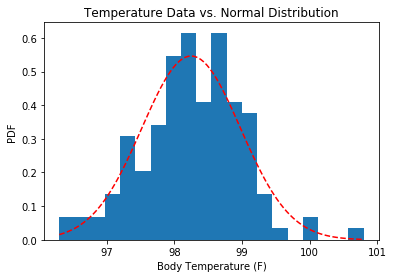

In [3]:
temps = df.temperature
x_bar, s = norm.fit(temps) # Mean and standard deviation

# Create normal distribution using temps
pdf_x = np.linspace(np.min(temps),np.max(temps),100)
pdf_y = norm.pdf(pdf_x, x_bar, s)

# Chart
_ = plt.hist(temps, bins=20, density=True) # temps data
_ = plt.plot(pdf_x, pdf_y, 'r--') # Normal distribution
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Temperature Data vs. Normal Distribution')
_ = plt.show()

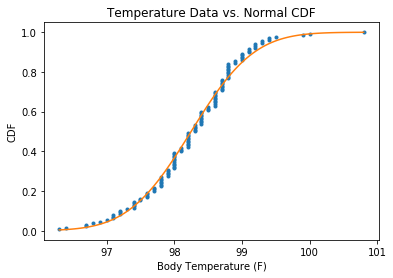

In [4]:
temps = df.temperature

x_bar, s = norm.fit(temps) # Mean and standard deviation

# Create normal distribution using temps
norm_xs = np.linspace(np.min(temps), np.max(temps), 100)
norm_ys = norm.cdf(norm_xs, x_bar, s)

# Chart
_ = ecdf_plot(temps) # ecdf of temps data
_ = plt.plot(norm_xs, norm_ys) # cdf of Normal distribution
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('Temperature Data vs. Normal CDF')

#  #2: Is the sample size large? Are the observations independent?

a) The sample size is 130 (which is greater than 30), so it's large enough to be meaningful.  

b) I'm assuming that the observations are independent, but frankly we don't have much to go on here.  (I did a search online and the real data set differs from this practice set. In any case I don't have a ton of faith that this could be considered independent, but I will assume they're independent so I can continue with the questions.)

In particular, if our population is greater than 1300 individuals, a sample size of 130 without replacement is sufficient to replicate a sample with replacement.

Without assuming that they're independent we can't continue the exercise, so I will nod to that and move on.

# #3: Is the true population mean really 98.6 degrees F?

### Part 1
Our bootstrap hypothesis test shows that the 95% confidence interval for the mean is roughly 98.12 to 98.38 degrees.  From this analysis, no, the true mean is not 98.6 degrees. 

Below is a chart of the bootstrap hypothesis, with the upper and lower bounds of the 95% confidence interval marked in yellow, with 98.6 highlighted in red.

Confidence interval: 98.12, 98.38


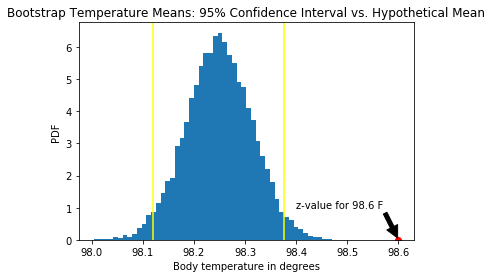

In [5]:
def bs_stat(dataset, function, size):
    """Return a bootstrap statistic from a dataset.
    Input: the dataset, the function to define the statistic, and the number of samples to run.
    Output: an np.array of sample statistics."""
    
    result = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(dataset, len(dataset))
        result[i] = function(bs_sample)
    
    return result

# bootstrap and plot from sample
bootstrap = bs_stat(df.temperature, np.mean, 10000)
_ = plt.hist(bootstrap, bins=50, density=1)
_ = plt.xlabel('Body temperature in degrees')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Temperature Means: 95% Confidence Interval vs. Hypothetical Mean')

# create and chart conf interval and 98.6
conf = np.percentile(bootstrap, [2.5, 97.5])
_ = plt.axvline(conf[0], color='yellow')
_ = plt.axvline(conf[1], color='yellow')
#_ = plt.axvline(98.6, color='red')
_ = plt.plot(98.6, 0.0, 'ro')
_ = plt.annotate('z-value for 98.6 F', xy=(98.6, .01), xytext=(98.4, 1), arrowprops=dict(facecolor='black', shrink=0.05))


print('Confidence interval: ' + '{:4.2f}'.format(conf[0]) + ', ' + '{:4.2f}'.format(conf[1]))

### Part 2
*Question: Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?*

The mean could vary in either direction.  So let's do a two-tail test.

### Part 3
*Question: In this situation, is it appropriate to use the $t$ or $z$ statistic?*

Since we're assuming the underlying distribution is normal, we can use the z-statistic. Let's use alpha = 0.05, i.e. 95% confidence.

As seen below, our z-value is roughly -5.5, definitely in our rejection region. The mean is *not* 98.6 degrees.

Rejection region : < -1.96 or > 1.96
z-value for mean of 98.6 degrees: 5.48
Reject the null hypothesis


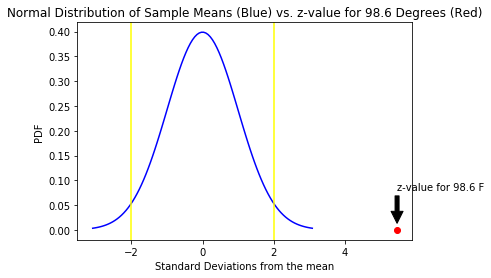

In [6]:
# z-test for the population mean
# H0: The actual mean is 98.6 degrees.
# H1: The actual mean is <98.6 degrees.

# Initialize variables
mu = 98.6 # population mean according to H0
x_bar = np.mean(df.temperature) # sample mean
s = np.std(df.temperature) # sample standard deviation
n = len(df.temperature) # number of trials
s_x_bar = s / (n**0.5) # standard error of the sample mean

# z-statistic for 95% confidence in two tails
crit_val = norm.ppf(0.975) # roughly 1.96

# z-value based on sample data
z_val = (mu - x_bar)/ s_x_bar

# report results verbally
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('z-value for mean of 98.6 degrees: ' + '{:4.2f}'.format(z_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
#x = np.linspace(norm.ppf(0.025), norm.ppf(0.975), 100)
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
_ = plt.plot(x, norm.pdf(x), 'b-')

# add our z_val, confidence interval, and labels
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.annotate('z-value for 98.6 F', xy=(z_val, .01), xytext=(z_val, 0.08), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(-2, color='yellow')
_ = plt.axvline(2, color='yellow')
_ = plt.title('Normal Distribution of Sample Means (Blue) vs. z-value for 98.6 Degrees (Red)')
_ = plt.xlabel('Standard Deviations from the mean')
_ = plt.ylabel('PDF')

### Part 4
*Question: Now try using the other test. How is the result be different? Why?*

Using a z-test, the result is not different because our sample mean is so far from the null-hypothesis population mean.  

Our rejection region is smaller using a z-test (from -1.96 to 1.96 for a z-test versus -1.98 to 1.98 for a t-test).  

Because our sample mean is so far from the null-hypothesis population mean, the difference in rejection region between a t-test and a z-test really doesn't even show up on our charts.

Rejection region : < -1.98 or > 1.98
t-value for mean of 98.6 degrees: 5.48
Reject the null hypothesis


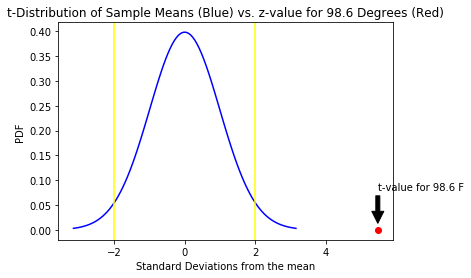

In [7]:
# t-test for the population mean
# H0: The actual mean is 98.6 degrees.
# H1: The actual mean is <98.6 degrees.

# Initialize variables
mu = 98.6 # population mean according to H0
x_bar = np.mean(df.temperature) # sample mean
s = np.std(df.temperature) # sample standard deviation
n = len(df.temperature) # number of trials
s_x_bar = s / (n**0.5) # standard error of the sample mean
deg_f = len(df.temperature) - 1 # degrees of freedom

# t-statistic for 95% confidence in two tails
crit_val = t.ppf(0.975, deg_f) # roughly 1.9785

# t-value based on sample data
t_val = (mu - x_bar)/ s_x_bar

# report results verbally
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('t-value for mean of 98.6 degrees: ' + '{:4.2f}'.format(t_val))
if t_val < -crit_val or t_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of t-distribution
x = np.linspace(t.ppf(0.001, deg_f), t.ppf(0.999, deg_f), 100)
plt.plot(x, t.pdf(x, deg_f),'b-')

# add our t_val, confidence interval, and labels
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.annotate('t-value for 98.6 F', xy=(z_val, .01), xytext=(z_val, 0.08), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(-2, color='yellow')
_ = plt.axvline(2, color='yellow')
_ = plt.title('t-Distribution of Sample Means (Blue) vs. z-value for 98.6 Degrees (Red)')
_ = plt.xlabel('Standard Deviations from the mean')
_ = plt.ylabel('PDF')

# #4: Draw a small sample of size 10 from the data and repeat both frequentist tests. 

*Question: Which one is the correct one to use?*

With n = 10, since n < 30, the t-test is the right one to use.

Below are my t-test (first) and z-test (second).

Sample of 10: [97.2 98.  98.6 98.7 99.9 97.9 98.  98.6 96.7 98.6]
Rejection region : < -2.26 or > 2.26
t-value for mean of 98.6 degrees: -1.43
Fail to reject (i.e., accept) the null hypothesis


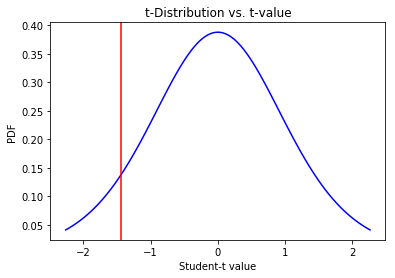

In [8]:
# t-test for population mean with sample size n=10
# H0: The actual mean is 98.6 degrees.
# H1: The actual mean is <98.6 degrees.

sample = np.random.choice(df.temperature, 10)

mu = 98.6 # population mean according to H0
x_bar = np.mean(sample) # sample mean
s = np.std(sample) # sample standard deviation
n = 10 # number of trials
s_x_bar = s / (n**0.5) # standard error of the sample mean
deg_f = n - 1 # degrees of freedom

# t-statistic for 95% confidence in two tails
crit_val = t.ppf(0.975, deg_f) # roughly 2.26

# t-value based on sample data
t_val = (x_bar - mu)/ s_x_bar

# report results verbally
print('Sample of 10: ' + str(sample))
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('t-value for mean of 98.6 degrees: ' + '{:4.2f}'.format(t_val))
if t_val < -crit_val or t_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of t-distribution
x = np.linspace(t.ppf(0.025, deg_f), t.ppf(0.975, deg_f), 100)
plt.plot(x, t.pdf(x, deg_f),'b-')

# add our t_val and labels
_ = plt.axvline(t_val, color='red')
_ = plt.annotate('t-value for 98.6 F', xy=(t_val, .01), xytext=(t_val, 0.08), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.title('t-Distribution vs. t-value')
_ = plt.xlabel('Student-t value')
_ = plt.ylabel('PDF')

[97.2 98.  98.6 98.7 99.9 97.9 98.  98.6 96.7 98.6]
Rejection region : < -1.96 or > 1.96
z-value for mean of 98.6 degrees: -1.43
Fail to reject (i.e., accept) the null hypothesis


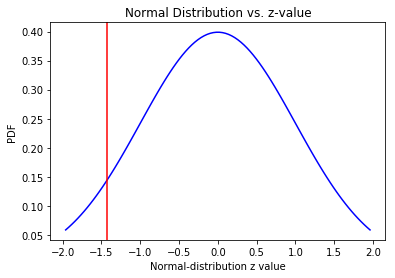

In [9]:
# z-test for population mean with sample size n=10
# Note that I'm using the same sample as above, for apples-to-apples comparison

# H0: The actual mean is 98.6 degrees.
# H1: The actual mean is <98.6 degrees.

print(sample)

# Initialize variables
mu = 98.6 # population mean according to H0
x_bar = np.mean(sample) # sample mean
s = np.std(sample) # sample standard deviation
n = len(sample) # number of trials
s_x_bar = s / (n**0.5) # standard error of the sample mean

# z-statistic for 95% confidence in two tails
crit_val = norm.ppf(0.975) # roughly 1.96

# z-value based on sample data
z_val = (x_bar - mu)/ s_x_bar

# report results verbally
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('z-value for mean of 98.6 degrees: ' + '{:4.2f}'.format(z_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
x = np.linspace(norm.ppf(0.025), norm.ppf(0.975), 100)
plt.plot(x, norm.pdf(x), 'b-')

# add our z_val and labels
_ = plt.axvline(z_val, color='red')
_ = plt.title('Normal Distribution vs. z-value')
_ = plt.xlabel('Normal-distribution z value')
_ = plt.ylabel('PDF')

### Part 2

*Question: What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?*

A couple of things:
* The rejection region for the z-test didn't change based on n, whereas it did for the t-test.
* More to the point, the t-test had a broader rejection region in both cases - but the region was *especially* broad for a smaller sample size.

What it tells me?  The z-test is preferable, and the difference between the tests increases as the sample size decreases.  

If the n is something like 130, the differences will likely be nearly negligible.

# #5: At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

Abnormal temperatures: less than 96.82 or higher than 99.68.


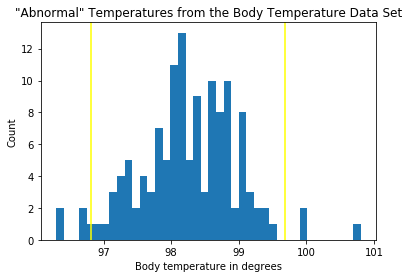

In [10]:
# Frequentist approach
temps = df.temperature
x_bar, s = norm.fit(temps) # Sample mean and sample standard deviation

# Margin of error
crit_z_value = 1.96 # 95% confidence interval in two tails

# Confidence interval for single draw
lower = x_bar - crit_z_value * s
upper = x_bar + crit_z_value * s

print('Abnormal temperatures: less than ' + '{:4.2f}'.format(lower) + ' or higher than ' + '{:4.2f}'.format(upper) + '.')
# Create chart and add vertical lines for confidence interval
_ = plt.hist(temps, bins=40)
_ = plt.xlabel('Body temperature in degrees')
_ = plt.ylabel('Count')
_ = plt.title('"Abnormal" Temperatures from the Body Temperature Data Set')
_ = plt.axvline(lower, color='yellow')
_ = plt.axvline(upper, color='yellow')

Abnormal temperatures: less than 96.70 or higher than 99.50.


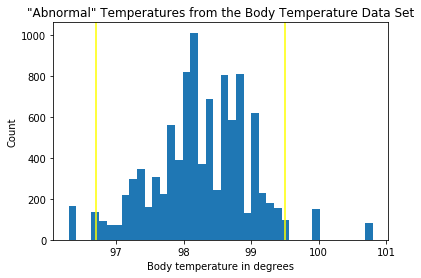

In [11]:
# Bootstrap approach
temps = df.temperature
samples = np.random.choice(temps, 10000)

lower, upper = np.percentile(samples, [2.5, 97.5])
print('Abnormal temperatures: less than ' + '{:4.2f}'.format(lower) + ' or higher than ' + '{:4.2f}'.format(upper) + '.')
# Create chart and add vertical lines for confidence interval
_ = plt.hist(samples, bins=40)
_ = plt.xlabel('Body temperature in degrees')
_ = plt.ylabel('Count')
_ = plt.title('"Abnormal" Temperatures from the Body Temperature Data Set')
_ = plt.axvline(lower, color='yellow')
_ = plt.axvline(upper, color='yellow')

# #6: Is there a significant difference between males and females in normal temperature?

*Question: What testing approach did you use and why?*

Below I use a two-sample z-test, because we're assuming a normally-distributed population and therefore we know the standard deviation of the population.  Since each group has size n = 65, the z-test is justified.  I also ran a bootstrap test to check, and both agree that there IS a significant difference in men's and women's body temperature. 

The evidence suggests (but our tests do not prove) that women's body temperatures are slightly higher than men's.

*Question: Write a story with your conclusion in the context of the original problem.* 

With 95% confidence, the data shows a significant difference in the mean body temperatures of men and women.

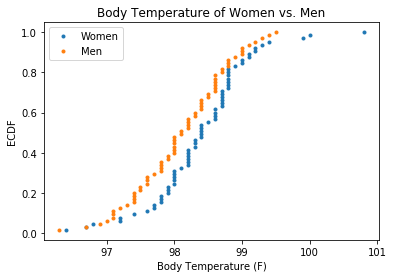

In [12]:
# Initialize the men and women samples
temps = df.temperature
men = df.loc[df.gender == 'M', 'temperature']
women = df.loc[df.gender == 'F', 'temperature']

# chart
_= ecdf_plot(women)
_= ecdf_plot(men)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.title('Body Temperature of Women vs. Men')
_ = plt.legend(['Women', 'Men'])

Sample mean of men: 98.10
Sample mean of women: 98.39
Rejection region : < -1.96 or > 1.96
z-value for no difference between men and women in mean body temperature: -2.30
Reject the null hypothesis


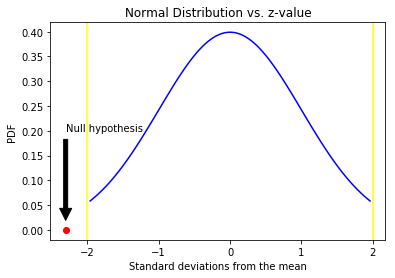

In [13]:
# Frequentist approach
# H0: There is NO difference in the means of men's and women's temperature.
# H1: There is a difference in the means of men's and women's temperature.
# alpha = 0.05 (95% confidence)

# Initialize the total, men, and women samples
temps = df.temperature
men = df.loc[df.gender == 'M', 'temperature']
women = df.loc[df.gender == 'F', 'temperature']
n_men = len(men) # number of samples that are men
n_women = len(women) # number of samples that are women

# Get mean and standard deviation for men, women, and total group
x_bar_men, s_men = norm.fit(men)
x_bar_women, s_women = norm.fit(women)

# Our null hypothesis is that in the population, the difference of means equals zero
diff_of_means = x_bar_men - x_bar_women

# Calculate standard error for men's and women's groups
standard_error_men = s_men / (n_men ** 0.5)
standard_error_women = s_women / (n_women ** 0.5)

crit_val = norm.ppf(.975) # critical value for two-sided 95% confidence ~ 1.96

# z-statistic for null hypothesis
z_val = (diff_of_means - 0) / ((s_men ** 2 / n_men) + (s_women ** 2 /n_women)) ** 0.5

# report results verbally
print('Sample mean of men: ' + '{:4.2f}'.format(x_bar_men))
print('Sample mean of women: ' + '{:4.2f}'.format(x_bar_women))
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('z-value for no difference between men and women in mean body temperature: ' + '{:4.2f}'.format(z_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
x = np.linspace(norm.ppf(0.025), norm.ppf(0.975), 100)
plt.plot(x, norm.pdf(x), 'b-')

# add our z_val and labels
#_ = plt.axvline(z_val, color='red')
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.axvline(-2, color='yellow')
_ = plt.axvline(2, color='yellow')
_ = plt.annotate('Null hypothesis', xy=(z_val, .01), xytext=(z_val, 0.2), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.title('Normal Distribution vs. z-value')
_ = plt.xlabel('Standard deviations from the mean')
_ = plt.ylabel('PDF')

Rejection region : < -0.25 or > 0.25
Sample value for mean of differences: -0.29
Reject the null hypothesis


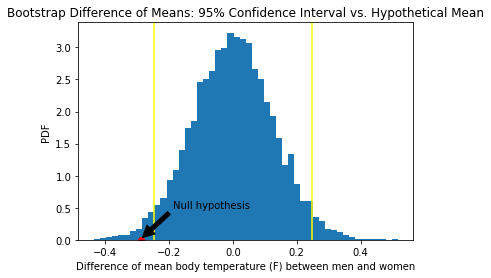

In [14]:
# Bootstrap approach
# H0: There is NO difference in the means of men's and women's temperature.
# H1: There is a difference in the means of men's and women's temperature.
# alpha = 0.05 (95% confidence)

# Initialize the total, men, and women samples
temps = df.temperature
men = df.loc[df.gender == 'M', 'temperature']
women = df.loc[df.gender == 'F', 'temperature']
n_men = len(men) # number of samples that are men
n_women = len(women) # number of samples that are women

# Get mean and standard deviation for men, women, and total group
x_bar_men, s_men = norm.fit(men)
x_bar_women, s_women = norm.fit(women)
x_bar_all, s_all = norm.fit(temps)

# Assuming null hypothesis, take 10,000 samples and create "men" and "women" means to test the difference
n_bs = 10000
diffs_of_means = np.empty(n_bs)
for i in range(n_bs):
    sample = np.random.choice(temps, len(temps))
    men = sample[:n_men]
    sample_mean_men = np.mean(men)
    women = sample[n_men:]
    sample_mean_women = np.mean(women)
    diffs_of_means[i] = sample_mean_men - sample_mean_women
    
lower, upper = np.percentile(diffs_of_means, [2.5, 97.5])
z_val = x_bar_men - x_bar_women

# report results verbally
print('Rejection region : < ' + '{:4.2f}'.format(lower) + ' or > ' + '{:4.2f}'.format(upper))
print('Sample value for mean of differences: ' + '{:4.2f}'.format(z_val))
if z_val < lower or z_val > upper:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')
    
# bootstrap and plot from sample
_ = plt.hist(diffs_of_means, bins=50, density=1)
_ = plt.xlabel('Difference of mean body temperature (F) between men and women')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Difference of Means: 95% Confidence Interval vs. Hypothetical Mean')

# create and chart conf interval and 98.6
conf = np.percentile(bootstrap, [2.5, 97.5])
_ = plt.axvline(lower, color='yellow')
_ = plt.axvline(upper, color='yellow')
#_ = plt.axvline(z_val, color='red')
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.annotate('Null hypothesis', xy=(z_val, .01), xytext=(z_val + 0.1, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))